In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange, interp1d

%matplotlib inline

# 1-d interpolation

## Linear i-d interpolation

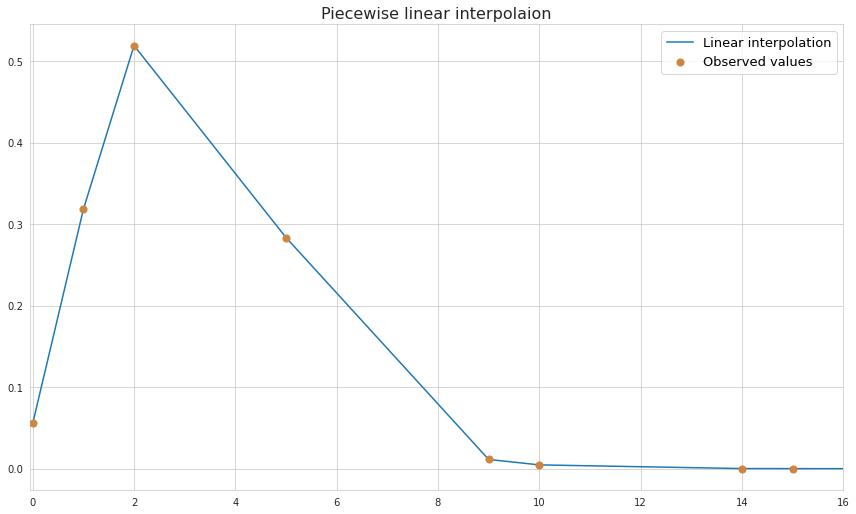

In [240]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

def func(x):
    new_array = (x+0.2)/(0.1*np.exp(x)+3.5)
    return new_array

#x = np.linspace(0, 11, 10)
x = np.array([0, 1, 2, 5, 9, 10, 14, 15]) 
x_ = np.array([0, 1, 2, 5, 9, 10, 14, 16]) # technical array for plotting outside the know range
x2 = np.linspace(0, 16, 1100) # technical array for plotting continuous functions
y = func(x) # observed values at known datapoints

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x_, func(x_), label='Linear interpolation') # linear interpolation
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Piecewise linear interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_linear.png', bbox_inches='tight');

## Polynomial i-d interpolation

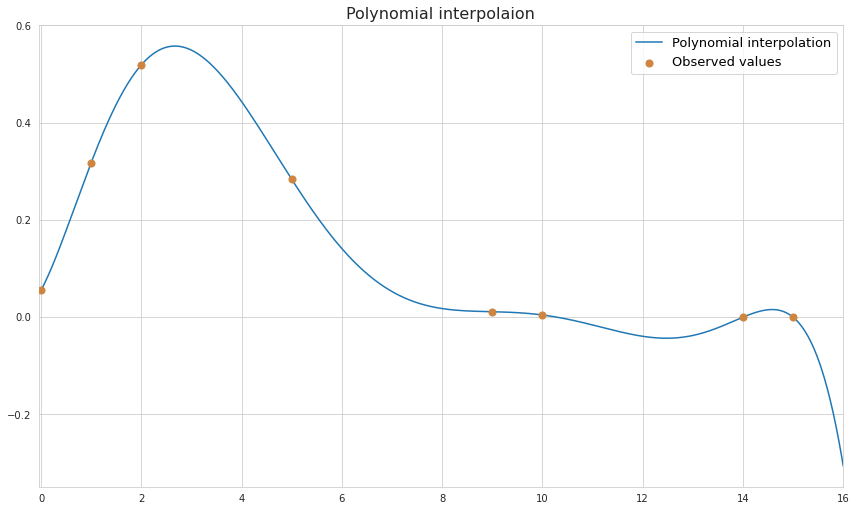

In [246]:
poly = lagrange(x, y) # find coefficients for Lagrange polynomial using known points 
y2 = poly(x2) # values obtained with the fitted function 

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x2, y2, label='Polynomial interpolation') # Lagrange polynomial interpolation
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Polynomial interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_polynomial.png', bbox_inches='tight');

## Spline

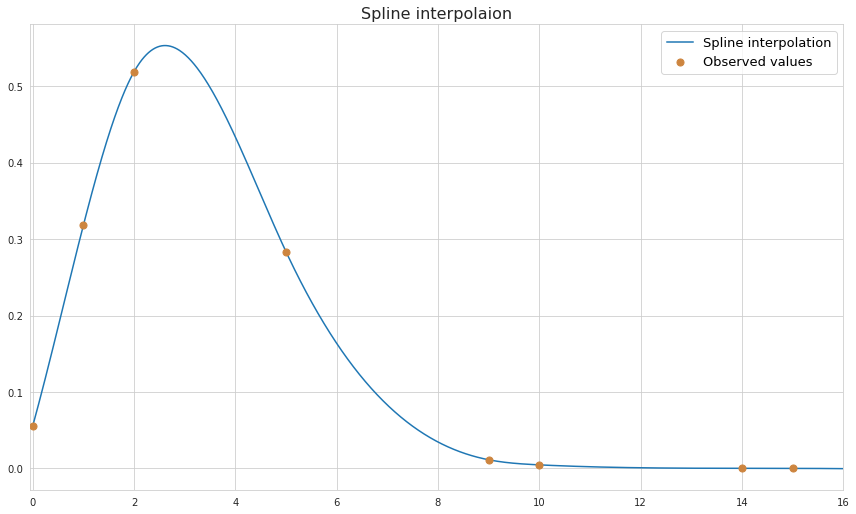

In [247]:
spline2 = interp1d(x, y, kind=3, fill_value='extrapolate') # spline of second order
y_spline2 = spline2(x2) # values obtained with the fitted function 

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x2, y_spline2, label='Spline interpolation') # Lagrange polynomial
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Spline interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_spline.png', bbox_inches='tight');

## Bezier curves

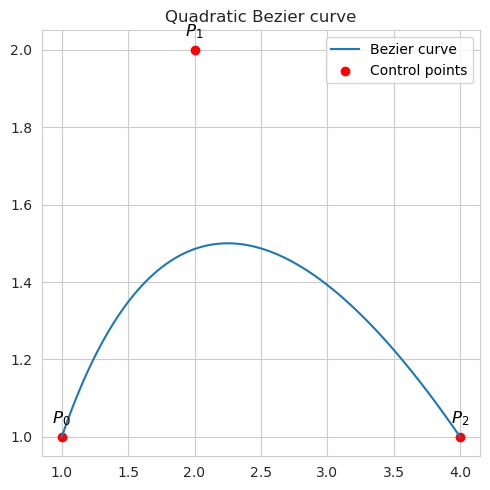

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def quadratic_bezier(t, p0, p1, p2):
    u = 1 - t
    return u**2 * p0 + 2 * u * t * p1 + t**2 * p2

def cubic_bezier(t, p0, p1, p2, p3):
    u = 1 - t
    return u**3 * p0 + 3 * u**2 * t * p1 + 3 * u * t**2 * p2 + t**3 * p3

# Control points for quadratic Bézier curve
p0_quad = np.array([1, 1])
p1_quad = np.array([2, 2])
p2_quad = np.array([4, 1])

# Generate values for parameter 't'
t_values = np.linspace(0, 1, 100)

# Calculate points on the curves for each 't'
quadratic_curve_points = np.array([quadratic_bezier(t, p0_quad, p1_quad, p2_quad) for t in t_values])

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(5, 5))

# Plotting quadratic Bézier curve
plt.plot(quadratic_curve_points[:, 0], quadratic_curve_points[:, 1], label='Bezier curve')
plt.scatter([p0_quad[0], p1_quad[0], p2_quad[0]], [p0_quad[1], p1_quad[1], p2_quad[1]], color='red', label='Control points')
for i, txt in zip([p0_quad, p1_quad, p2_quad], ['$P_0$', '$P_1$', '$P_2$']):
    plt.annotate(txt, (i[0], i[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.title('Quadratic Bezier curve')
plt.legend()
plt.tight_layout()
plt.savefig('../../assets/images/regression/interpolation_bezier_quad.png', bbox_inches='tight');

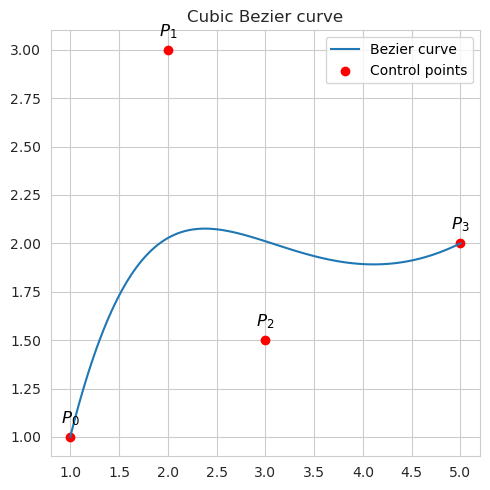

In [22]:
# Control points for cubic Bézier curve
p0_cubic = np.array([1, 1])
p1_cubic = np.array([2, 3])
p2_cubic = np.array([3, 1.5])
p3_cubic = np.array([5, 2])

cubic_curve_points = np.array([cubic_bezier(t, p0_cubic, p1_cubic, p2_cubic, p3_cubic) for t in t_values])

# Plotting cubic Bézier curve
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(cubic_curve_points[:, 0], cubic_curve_points[:, 1], label='Bezier curve')
plt.scatter([p0_cubic[0], p1_cubic[0], p2_cubic[0], p3_cubic[0]], [p0_cubic[1], p1_cubic[1], p2_cubic[1], p3_cubic[1]], color='red', label='Control points')
for i, txt in zip([p0_cubic, p1_cubic, p2_cubic, p3_cubic], ['$P_0$', '$P_1$', '$P_2$', '$P_3$']):
    plt.annotate(txt, (i[0], i[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.title('Cubic Bezier curve')
plt.legend()
plt.tight_layout()
plt.savefig('../../assets/images/regression/interpolation_bezier_cubic.png', bbox_inches='tight');